In [1]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [4,4]
import sys
import os
scriptpath = 'your_path'
sys.path.append(os.path.abspath(scriptpath))


In [2]:
import halfsat

In [3]:
from halfsat import webSum_10x_halfSat, metrics, predictUMIs

In [4]:
web_summary_list = ['Brain_3p_web_summary.html',
                    'Brain_3p_LT_web_summary.html',
                    'Breast_Cancer_3p_LT_web_summary.html']
web_summary_arc = 'human_brain_3k_web_summary.html'
# generated from 10x's public 500_PBMC_3p_LT_Chromium_X dataset
metrics_summary_json = 'metrics_summary_json.json'

# 1) Median UMIs per Cell Modeling
Via scraping 10x Genomic's CellRanger count metrics_summary_json.json file

### Build a UMI_model object with various attributes scraped from the 10x json file

In [5]:
# metrics_summary_json was generated from 10x's public 500_PBMC_3p_LT_Chromium_X dataset
# build UMI_model first
my_UMI_model = predictUMIs.UMI_model(metrics_summary_json)
# check out the model attributes
my_UMI_model.current_reads_per_cell, my_UMI_model.current_UMIs

(128910.867120954, 8935.0)

### Scrape reads and UMI information from the json file exclusively


In [6]:
my_UMI_model_reads, my_UMI_model_UMIs = predictUMIs.get_reads_and_UMIs_from_json(metrics_summary_json)
print('reads: ', my_UMI_model_reads) 
print('UMIs: ', my_UMI_model_UMIs)

reads:  [  5000.  10000.  12891.  20000.  25782.  30000.  38673.  50000.  51564.
  64455.  77346.  90237. 103128. 116019. 128910.]
UMIs:  [1596.0, 2827.0, 3380.0, 4551.0, 5253.0, 5705.0, 6388.0, 7049.0, 7128.0, 7638.0, 8021.0, 8287.0, 8552.0, 8731.0, 8935.0]


### fit UMI model with read and UMI data from json

In [7]:
my_UMI_model.fit_UMIs()
my_UMI_model.make_UMI_table()

Here is the information pertaining to the model:
reads from JSON path:  [  5000.  10000.  12891.  20000.  25782.  30000.  38673.  50000.  51564.
  64455.  77346.  90237. 103128. 116019. 128910.]
UMIs from JSON path:  [1596.0, 2827.0, 3380.0, 4551.0, 5253.0, 5705.0, 6388.0, 7049.0, 7128.0, 7638.0, 8021.0, 8287.0, 8552.0, 8731.0, 8935.0]
popt: [27720.1108838  10880.01386964] and pcov: [[145150.64382024  17595.72368607]
 [ 17595.72368607   2535.53923155]]
halfsat_reads_per_cell: 27720  ymax_UMIs: 10880  halfsat_UMI_counts: 5440


,sample_id,reads_per_cell,current_UMIs,halfsat_reads_per_cell,halfsat_UMI_counts,max_UMIs,predicted UMIs for 40000 reads per cell
0,500_PBMC_3p_LT_Chromium_X,128910,8935,27720,5440,10880,6426


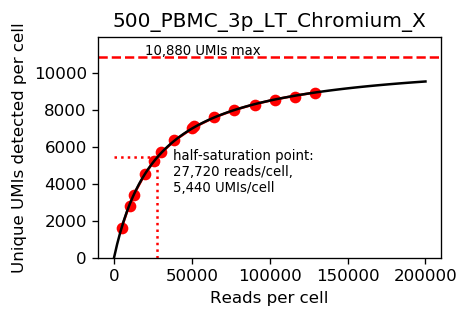

In [8]:
my_UMI_model.plot_UMIs(readMax=200000)

# 2) Sequencing Saturation and Median Genes per Cell Modeling
Via scraping 10x Genomic's CellRanger count web_summary.html file

### Build web_sum model

In [9]:
Brain_3p = webSum_10x_halfSat.webSum_model(web_summary_list[0])

### Scrape reads, saturations, and genes information from web summary test file exclusively


In [10]:
reads_test, sat_test, genes_test = webSum_10x_halfSat.get_reads_sats_genes_from_web(web_summary_list[1])
reads_test, sat_test, genes_test

(array([ 5000,  5926, 10000, 11852, 17779, 20000, 23705, 29631, 30000,
        35558, 41484, 47411, 50000, 53337, 59263]),
 array([0.09903163, 0.11535163, 0.1819234 , 0.20943394, 0.28696438,
        0.31272946, 0.3518039 , 0.40648499, 0.40936431, 0.45288906,
        0.49294754, 0.52759076, 0.5412673 , 0.55786919, 0.58456097]),
 array([1184. , 1326.5, 1846.5, 2035.5, 2502.5, 2637.5, 2831. , 3085. ,
        3104.5, 3293.5, 3445. , 3569.5, 3617.5, 3672.5, 3764. ]))

### Fit model and plot train and test data on it


Model being used for sequencing  saturation is:  mm

Here is the information pertaining to the sequencing saturation model:
reads from web_summary path:  [ 3986  5000  7972 10000 11959 15945 19932 20000 23918 27905 30000 31891
 35878 39864]
saturations from web_summary path:  [0.08793436 0.10819453 0.16285586 0.19670443 0.2271536  0.28281733
 0.33144071 0.33232518 0.37421935 0.4120129  0.43013465 0.4455715
 0.4755934  0.50262026]
popt_saturation: [40017.93677488] and pcov_saturation: [[16821.10875345]]
halfsat_reads_per_cell: 40018  ymax_sat: 1  halfsat_saturation: 0.5

Here is the information pertaining to the gene saturation model:
reads from web_summary path:  [ 3986  5000  7972 10000 11959 15945 19932 20000 23918 27905 30000 31891
 35878 39864]
genes from web_summary path:  [1025.  1206.  1638.5 1872.  2062.  2384.5 2635.  2633.  2832.5 3002.
 3075.5 3137.  3256.5 3358. ]
popt_genes: [14090.8358764  4518.7295552] and pcov_genes: [[39360.39138894  4777.26777953]
 [ 4777.26777953   6

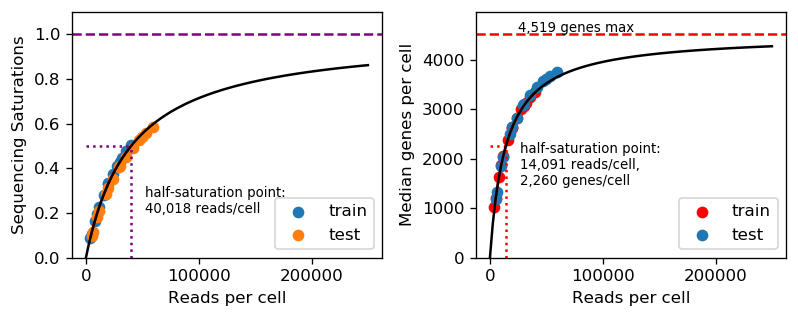

In [11]:
Brain_3p.fit_model(seqSatModel='mm')
Brain_3p.plot(readMax=250000, reads_test=reads_test, saturations_test=sat_test, genes_test=genes_test)

### Use models for prediction and test the goodness of fit


In [12]:
Brain_3p.predict_genes(genes_test)
Brain_3p.score_genes(reads_test, genes_test)

RSS: 50334.5  ymean: 2794.3333333333335  TSS: 10176173.833333332  Rsquared: 0.9950536910213618


0.9950536910213618

In [13]:
Brain_3p.predict_seq_saturation(reads_test)
Brain_3p.score_seq_saturation(reads_test, sat_test)

RSS: 0.004311862624179803  ymean: 0.3686808312730259  TSS: 0.3702697132169756  Rsquared: 0.9883548060501155


0.9883548060501155

# 3) Metric Tables

In [14]:
# Full Table
metrics.tableGenerator(web_summary_list, 'GEX', 'full')

,Sample ID,Sample Description,Chemistry,Include introns,Reference Path,Transcriptome,Pipeline Version,Number of Reads,Number of Short Reads Skipped,Valid Barcodes,...,Estimated Number of Cells,Fraction Reads in Cells,Mean Reads per Cell,Median Genes per Cell,Total Genes Detected,Median UMI Counts per Cell,tso_frac,i1_bases_with_q30_frac,i2_bases_with_q30_frac,low_support_umi_reads_frac
0,Brain_3p,"Sorted nuclei from Human brain, 3’ v3.1",Single Cell 3' v3,True,/mnt/scratch2/cellranger-6.0.0/references/refd...,GRCh38-2020-A,cellranger-6.0.0,"263,425,246",0,96.7%,...,"6,608",91.9%,"39,865","3,358","31,287","8,066",0.144249,0.959889,0.941109,0.004700
1,Brain_3p_LT,"Sorted nuclei from Human brain, 3’ LT v3.1",Single Cell 3' v3 LT,True,/mnt/scratch2/cellranger-6.0.0/references/refd...,GRCh38-2020-A,cellranger-6.0.0,"37,099,167",0,96.1%,...,626,88.4%,"59,264","3,764","26,541","9,250",0.188941,0.944693,0.928160,0.005282
2,Breast_Cancer_3p_LT,Sorted cells from Human Invasive Ductal Carcin...,Single Cell 3' v3 LT,False,/mnt/scratch2/cellranger-6.0.0/references/refd...,GRCh38-2020-A,cellranger-6.0.0,"42,854,607",0,97.5%,...,687,91.8%,"62,379","3,023","21,667","14,292",0.089274,0.953108,0.936143,0.003269


In [15]:
# Full Table ARC
atacTable, gexTable = metrics.tableGenerator([web_summary_arc], webSummaryType='ARC', tableType='full')

In [16]:
atacTable

,Sample ID,Sample description,Pipeline version,Reference path,Chemistry,Organism,Include introns,Feature linkages detected,Linked genes,Linked peaks,...,Fraction of transposition events in peaks in cells,Median high-quality fragments per cell,Confidently mapped read pairs,Unmapped read pairs,Non-nuclear read pairs,Number of peaks,Fraction of genome in peaks,TSS enrichment score,Fraction of high-quality fragments overlapping TSS,Fraction of high-quality fragments overlapping peaks
0,human_brain_3k,Frozen human healthy brain tissue (3k),cellranger-arc-2.0.0,/mnt/scratch2/cellranger-arc-2.0.0/refdata-cel...,Single Cell Multiome ATAC + Gene Expression v1,Homo_sapiens,True,"847,025","13,629","88,843",...,35.3%,"22,881",91.2%,1.0%,1.3%,"134,030",3.7%,6.53,28.6%,38.8%


In [17]:
gexTable

,Sample ID,Sample description,Pipeline version,Reference path,Chemistry,Organism,Include introns,Feature linkages detected,Linked genes,Linked peaks,...,Median UMI counts per cell,Median genes per cell,Total genes detected,Reads mapped to genome,Reads mapped confidently to genome,Reads mapped confidently to intergenic regions,Reads mapped confidently to intronic regions,Reads mapped confidently to exonic regions,Reads mapped confidently to transcriptome,Reads mapped antisense to gene
0,human_brain_3k,Frozen human healthy brain tissue (3k),cellranger-arc-2.0.0,/mnt/scratch2/cellranger-arc-2.0.0/refdata-cel...,Single Cell Multiome ATAC + Gene Expression v1,Homo_sapiens,True,"847,025","13,629","88,843",...,"6,966","2,600","31,201",96.9%,92.2%,6.2%,65.4%,20.6%,73.9%,11.1%


In [18]:
# Delivery doc (abbreviated table)
metrics.tableGenerator(web_summary_list, 'GEX', 'delivery doc')

,Sample ID,Number of Reads,Sequencing Saturation,Reads Mapped to Genome,Reads Mapped Confidently to Genome,Estimated Number of Cells,Fraction Reads in Cells,Mean Reads per Cell,Median Genes per Cell,Median UMI Counts per Cell,tso_frac
0,Brain_3p,"263,425,246",50.3%,96.7%,92.7%,"6,608",91.9%,"39,865","3,358","8,066",0.144249
1,Brain_3p_LT,"37,099,167",58.5%,95.9%,91.5%,626,88.4%,"59,264","3,764","9,250",0.188941
2,Breast_Cancer_3p_LT,"42,854,607",32.8%,96.6%,93.2%,687,91.8%,"62,379","3,023","14,292",0.089274


In [19]:
# repooling table
metrics.tableGenerator(web_summary_list, 'GEX', 'repooling', readsDesired = 80000)

,sample id,number of reads,estimated number of cells,mean reads per cell,reads needed for 80000 reads per cell,total reads needed for 80000 reads per cell,percent of lane
0,Brain_3p,263425246,6608,39865,40135,265212080,0.913584
1,Brain_3p_LT,37099167,626,59264,20736,12980736,0.044715
2,Breast_Cancer_3p_LT,42854607,687,62379,17621,12105627,0.041701
